In [1]:
import json
import requests
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# 设置绘图参数
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "text.usetex" : True,
    "font.family" : "serif",
    "font.serif" : ["Computer Modern Serif"]
}
# 注意：需要有安装的 TeX 发行版，否则在使用matplotlib和seaborn时会报错！
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))

Python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0] on linux


In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Preprocessing

In [11]:
df = pd.read_csv("./data/rumor_data.csv", index_col=0)

In [12]:
df.head()

,date,source,content,province,user_0,user_1,user_2,user_3,user_4,user_5,...,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
0,2022-02-18,北京日报客户端,有人从香港游泳偷渡到深圳湾被捕？假的！系轻生被救！,广东,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-18,大河报、羊城晚报,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息...,河南,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41
2,2022-02-17,南方都市报、大众网,近日，网传湖南衡阳“南岳衡山寺庙”高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不...,湖南,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,26
3,2022-02-17,江苏省互联网举报中心,近日，网传消息称“苏州市独墅湖医院正在建方舱”。该消息发布后，引发关注讨论。 经核实，网传...,江苏,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
4,2022-02-16,中国新闻网,在塞企业组织包机载客回国？中国驻塞内加尔使馆辟谣！,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      366 non-null    object
 1   source    360 non-null    object
 2   content   366 non-null    object
 3   province  277 non-null    object
 4   user_0    366 non-null    int64 
 5   user_1    366 non-null    int64 
 6   user_2    366 non-null    int64 
 7   user_3    366 non-null    int64 
 8   user_4    366 non-null    int64 
 9   user_5    366 non-null    int64 
 10  user_6    366 non-null    int64 
 11  user_7    366 non-null    int64 
 12  user_8    366 non-null    int64 
 13  user_9    366 non-null    int64 
 14  user_10   366 non-null    int64 
 15  user_11   366 non-null    int64 
 16  user_12   366 non-null    int64 
 17  user_13   366 non-null    int64 
 18  user_14   366 non-null    int64 
 19  user_15   366 non-null    int64 
 20  user_16   366 non-null    int64 
 21  user_17   366 non-nul

In [14]:
df.describe()

,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
count,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.040984,0.188525,0.04918,0.030055,0.010929,0.038251,0.046448,0.120219,0.038251,0.038251,0.087432,0.095628,0.027322,0.024590,0.021858,0.095628,0.019126,0.021858,72.590164
std,0.198524,0.391666,0.21654,0.170971,0.104111,0.192065,0.210742,0.325662,0.192065,0.192065,0.282853,0.294484,0.163244,0.155084,0.146420,0.294484,0.137154,0.146420,159.193795
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2495.000000


In [3]:
from data_preprocess import get_preprocessed_data

df = get_preprocessed_data()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.488 seconds.
Prefix dict has been built successfully.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           366 non-null    datetime64[ns]
 1   source         360 non-null    object        
 2   content        366 non-null    object        
 3   province       309 non-null    object        
 4   user_0         366 non-null    int64         
 5   user_1         366 non-null    int64         
 6   user_2         366 non-null    int64         
 7   user_3         366 non-null    int64         
 8   user_4         366 non-null    int64         
 9   user_5         366 non-null    int64         
 10  user_6         366 non-null    int64         
 11  user_7         366 non-null    int64         
 12  user_8         366 non-null    int64         
 13  user_9         366 non-null    int64         
 14  user_10        366 non-null    int64         
 15  user_11        366 non-null 

In [5]:
df.describe(percentiles=[0.5])

,date,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,...,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like,log_like
count,366,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2021-12-20 22:01:58.032786944,0.040984,0.188525,0.04918,0.030055,0.010929,0.038251,0.046448,0.120219,0.038251,...,0.087432,0.095628,0.027322,0.024590,0.021858,0.095628,0.019126,0.021858,72.590164,3.675683
min,2021-11-07 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-12-20 12:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.555348
max,2022-02-18 00:00:00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2495.000000,7.822445
std,NaN,0.198524,0.391666,0.21654,0.170971,0.104111,0.192065,0.210742,0.325662,0.192065,...,0.282853,0.294484,0.163244,0.155084,0.146420,0.294484,0.137154,0.146420,159.193795,1.080219


In [6]:
df.iloc[7]['content_token']

['网传', '横', '州市', '马', '山镇', '太宁', '村有', '阳性', '病例', '接触', '谣言']

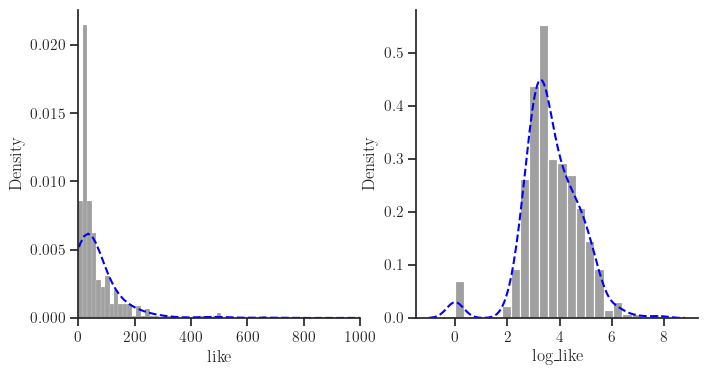

In [7]:
_, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(df['like'], ax=axes[0], color='grey', stat='density')
axes[0].set_xlim(0, 1000)  # 限制横坐标范围，防止尾部过长
sns.kdeplot(df['like'], ax=axes[0], color='blue', ls='--')
sns.histplot(df['log_like'], ax=axes[1],color='grey', stat='density')
sns.kdeplot(df['log_like'], ax=axes[1], color='blue', ls='--')
plt.savefig('./figures/loglike_like_hist.pdf', bbox_inches='tight')

# Data Visualization

## Rumor Number

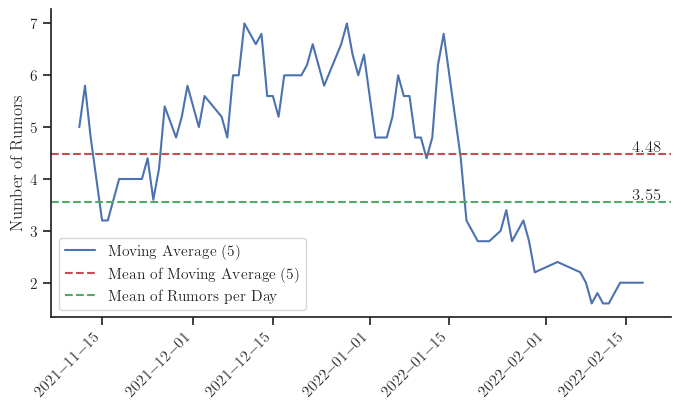

In [143]:
def rumor_num_moving_average(data: pd.DataFrame, window: int = 5) -> pd.Series:
    rumor_per_day = data.groupby('date').size()
    rumor_per_day_ma = rumor_per_day.rolling(window=window).mean()
    return rumor_per_day_ma

ma5 = rumor_num_moving_average(df, window=5)
_, ax = plt.subplots(figsize=(8, 4))
ax.plot(ma5, label='Moving Average (5)')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of Rumors')
ax.axhline(
    y=ma5.mean(),
    color='r', linestyle='--', label='Mean of Moving Average (5)'
)
ax.text(
    df['date'].max() - pd.Timedelta(2, unit='D'),
    ma5.mean() + 0.05,
    '{:.2f}'.format(ma5.mean())
)
ax.axhline(
    y=df.shape[0] / (df['date'].max() - df['date'].min()).days,
    color='g', linestyle='--', label='Mean of Rumors per Day'
)
ax.text(
    df['date'].max() - pd.Timedelta(2, unit='D'),
    df.shape[0] / (df['date'].max() - df['date'].min()).days + 0.05,
    '{:.2f}'.format(df.shape[0] / (df['date'].max() - df['date'].min()).days)
)
ax.legend()

plt.savefig('./figures/rumor_num_ma5.pdf', bbox_inches='tight')

In [134]:
state_geo = json.loads(requests.get("https://raw.githubusercontent.com/yezongyang/china-geojson/master/china.json").text)
total_provinces = [state_geo['features'][i]['properties']['name'] for i in range(len(state_geo['features']))]
province_rumor = df.groupby('province').size()
for i in total_provinces:
    if i not in province_rumor.index:
        province_rumor[i] = 0

3.5533980582524274

In [109]:
province_rumor_data = pd.DataFrame({'province': province_rumor.index, 'rumor_num': province_rumor.values})
province_rumor_data['type'] = province_rumor_data['rumor_num'].apply(lambda x: 'high' if x > 20 else 'low')
province_rumor_data['rumor_num_for_size'] = province_rumor_data['rumor_num'].apply(lambda x: x + 1)
province_rumor_data['rumor_num_for_color'] = province_rumor_data['rumor_num_for_size'].apply(lambda x: np.log(x))

In [120]:
pio.kaleido.scope.mathjax = None
fig = px.choropleth(province_rumor_data, geojson=state_geo,
                    locations='province', featureidkey="properties.name",
                    color_discrete_sequence=["rgba(102, 204, 255, 20)"],
)
fig.update_traces(showlegend=False)
fig2 = px.scatter_geo(province_rumor_data, geojson=state_geo,
                      locations='province', featureidkey="properties.name",
                      size='rumor_num_for_size',
                      color='rumor_num_for_color',
)
fig.add_trace(fig2.data[0])
for i, frame in enumerate(fig.frames):
    fig.frames[i].data += (fig2.frames[i].data[0],)
fig.update_geos(fitbounds="locations", visible=False, projection_type="natural earth")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, paper_bgcolor='rgb(255, 255, 255)', plot_bgcolor='rgb(255, 255, 255)',
                  geo=dict(bgcolor='rgb(255, 255, 255)'), font = dict(color = '#000000', family="Serif"))
fig.layout.coloraxis.colorbar.title = 'Scale of rumor numbers'
fig.layout.coloraxis.colorbar.len = 0.8
fig.write_image('./figures/rumor_num_choropleth.pdf')
# fig.show()

## Users

In [16]:
user_data = df[[f'user_{i}' for i in range(18)]]

In [17]:
user_data.head()

,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Text

In [4]:
from collections import Counter
from wordcloud import WordCloud
import jieba.analyse
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [5]:
df["topics"] = df["content"].apply(lambda x: jieba.analyse.extract_tags(x, topK=3))

In [6]:
c = Counter(df['content_token'].sum())

In [7]:
c2 = Counter(df['topics'].sum())

In [8]:
wordcloud = WordCloud(
    font_path='/mnt/c/Windows/Fonts/simhei.ttf',
    mask=np.array(Image.open("./data/ChinaMap.png")),
    background_color='white',
    max_words=200,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(c)

In [13]:
wordcloud.to_image()
wordcloud.to_file('./figures/wordcloud_tokens.png')

In [10]:
wordcloud2 = WordCloud(
    font_path='/mnt/c/Windows/Fonts/simhei.ttf',
    mask=np.array(Image.open("./data/ChinaMap.png")),
    background_color='white',
    max_words=200,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(c2)

In [14]:
wordcloud2.to_image()
wordcloud2.to_file('./figures/wordcloud_topics.png')

In [15]:
words_list=[]
for lines in df['content_token']:
    words_list.append(lines)

dictionary = corpora.Dictionary(words_list)
corpus = [dictionary.doc2bow(words) for words in words_list]

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=np.random.RandomState(42))

vis_data = gensimvis.prepare(lda, corpus, dictionary)
# pyLDAvis.display(vis_data)

In [ ]:
# from pyecharts.charts import ThemeRiver
# import pyecharts.options as opts
#
# data_list = data.values.tolist()
# series = ['主题1','主题2','主题3','主题4','主题5','主题6']
#
# # 绘制，设置类型为时间
# wc = ThemeRiver(init_opts=opts.InitOpts(height='600px')
#                 ).add(series_name=series, data=data_list, singleaxis_opts=opts.SingleAxisOpts(type_='time')
#                       ).render("theme.html")